In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix

import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error as mae

In [3]:
def check_data(df):
    print(df.head())
    print("\n")
    print("SHAPE")
    print(df.shape)
    print("\n")
    print("DATA TYPES")
    print(df.dtypes)
    print("\n")
    print("UNIQUE VALUES")
    print(df.nunique())
    print("\n")
    print("MISSING VALUES")
    print(df.isna().sum())

In [4]:
df = pd.read_csv('data/full_data.csv')

In [5]:
df.head()

,timestamp,prcp,pres,rhum,season,temp,wdir,weco,wspd,count
0,1.617340e+09,0.0,1029.4,84.0,spring,3.0,33.0,fair,14.8,19
1,1.617343e+09,0.0,1029.5,81.0,spring,3.6,36.0,fair,16.7,60
2,1.617347e+09,0.0,1029.7,NaN,spring,4.6,39.0,fair,18.5,82
3,1.617350e+09,0.0,1029.9,71.0,spring,5.8,44.0,fair,20.4,82
4,1.617354e+09,0.0,1030.1,NaN,spring,6.7,43.0,cloudy,20.4,17


In [6]:
df.describe()

,timestamp,prcp,pres,rhum,temp,wdir,wspd,count
count,1.568400e+04,15684.000000,15684.000000,6261.000000,15684.000000,15684.000000,15684.000000,15684.000000
mean,1.657697e+09,0.071844,1016.419702,79.302508,11.794313,192.502040,14.043210,885.917304
std,2.338653e+07,0.318425,10.318900,15.069716,6.159160,96.061583,6.485885,4445.471671
min,1.617340e+09,0.000000,976.100000,20.000000,-5.600000,1.000000,1.800000,0.000000
25%,1.637322e+09,0.000000,1010.200000,70.000000,7.400000,116.000000,9.300000,0.000000
50%,1.657813e+09,0.000000,1017.100000,84.000000,11.800000,214.000000,13.000000,0.000000
75%,1.678108e+09,0.000000,1023.500000,91.000000,16.000000,259.000000,18.400000,109.000000
max,1.698005e+09,6.000000,1046.500000,100.000000,35.500000,360.000000,61.100000,95848.000000


In [7]:
check_data(df)

      timestamp  prcp    pres  rhum  season  temp  wdir    weco  wspd  count
0  1.617340e+09   0.0  1029.4  84.0  spring   3.0  33.0    fair  14.8     19
1  1.617343e+09   0.0  1029.5  81.0  spring   3.6  36.0    fair  16.7     60
2  1.617347e+09   0.0  1029.7   NaN  spring   4.6  39.0    fair  18.5     82
3  1.617350e+09   0.0  1029.9  71.0  spring   5.8  44.0    fair  20.4     82
4  1.617354e+09   0.0  1030.1   NaN  spring   6.7  43.0  cloudy  20.4     17


SHAPE
(15684, 10)


DATA TYPES
timestamp    float64
prcp         float64
pres         float64
rhum         float64
season        object
temp         float64
wdir         float64
weco          object
wspd         float64
count          int64
dtype: object


UNIQUE VALUES
timestamp    15684
prcp            51
pres           640
rhum            78
season           4
temp           377
wdir           360
weco            15
wspd            43
count         2225
dtype: int64


MISSING VALUES
timestamp       0
prcp            0
pres     

In [8]:
df.columns

Index(['timestamp', 'prcp', 'pres', 'rhum', 'season', 'temp', 'wdir', 'weco',
       'wspd', 'count'],
      dtype='object')

In [12]:
dataset = df

In [13]:
#Checking for any null values and removing the null values'''
print('Null Values =', dataset.isnull().values.any())

#dataset[dataset.columns.values] = dataset[dataset.columns.values].ffill()
#remove the rows with null values
dataset = dataset.dropna()

#dataset=dataset.drop(columns=['Timestamp'])

print('Null Values =', dataset.isnull().values.any())

Null Values = True
Null Values = False


In [12]:
df.set_index('timestamp', inplace=True)

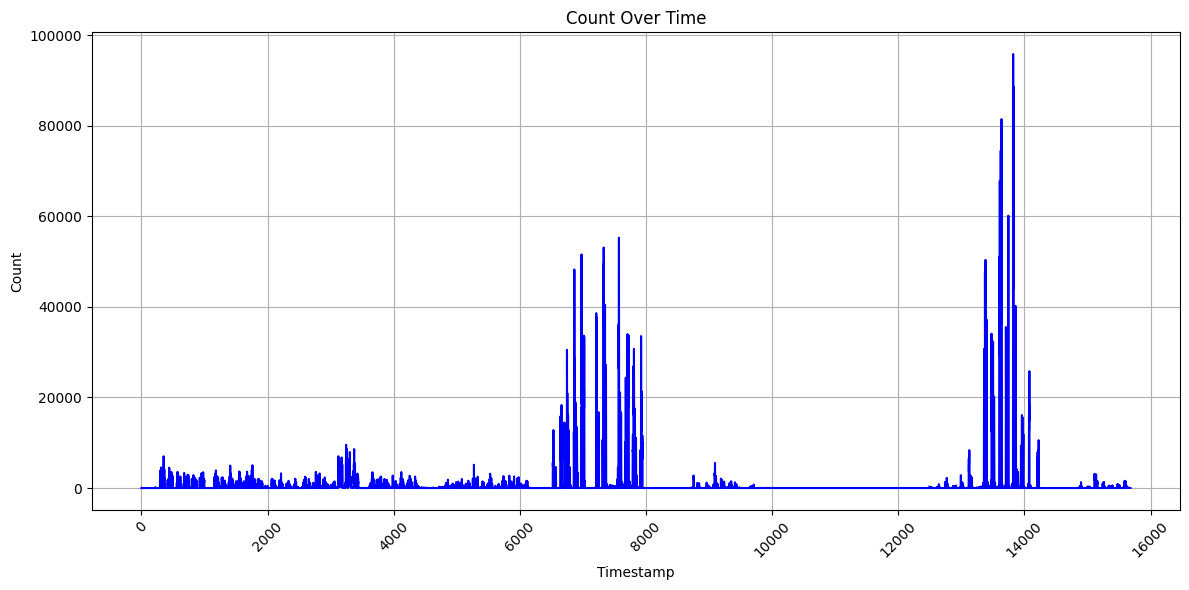

In [21]:
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['count'], color='b')

# Customize the plot
plt.title('Count Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Count')

# Optionally, you can rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

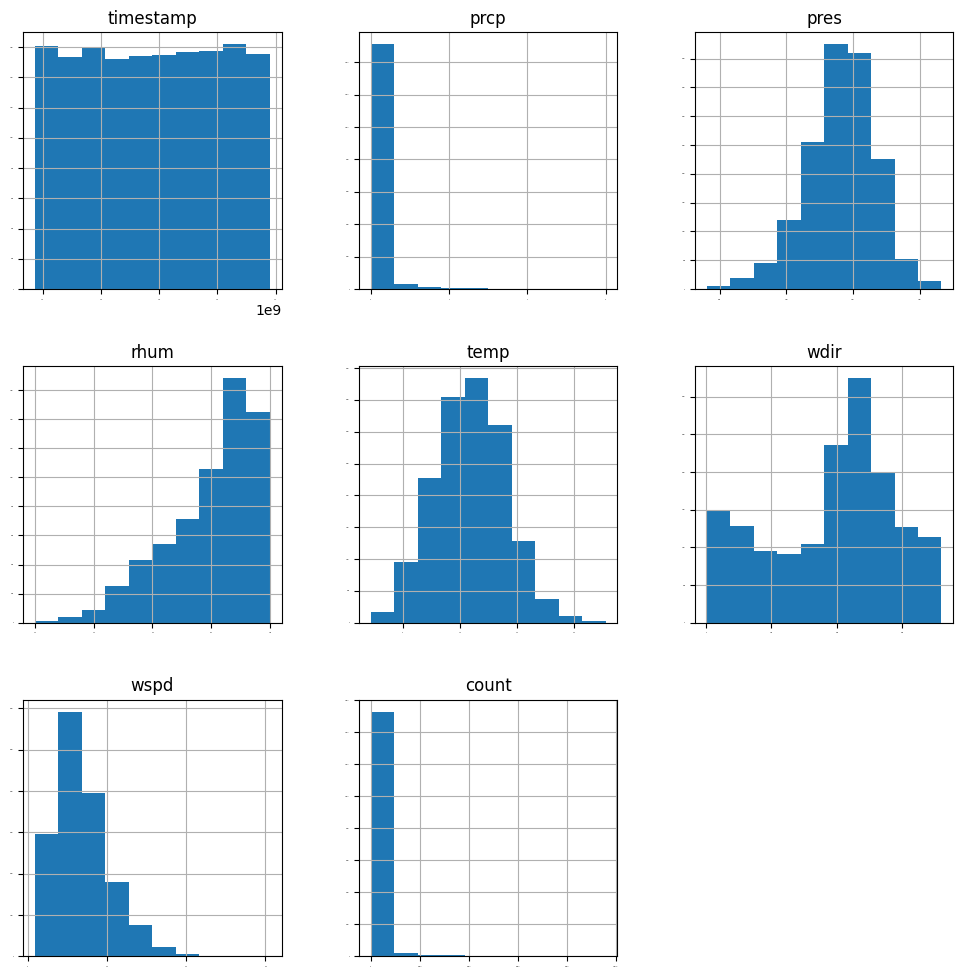

In [14]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

In [16]:
# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include='number')


<Axes: title={'center': 'Correlation Matrix'}>

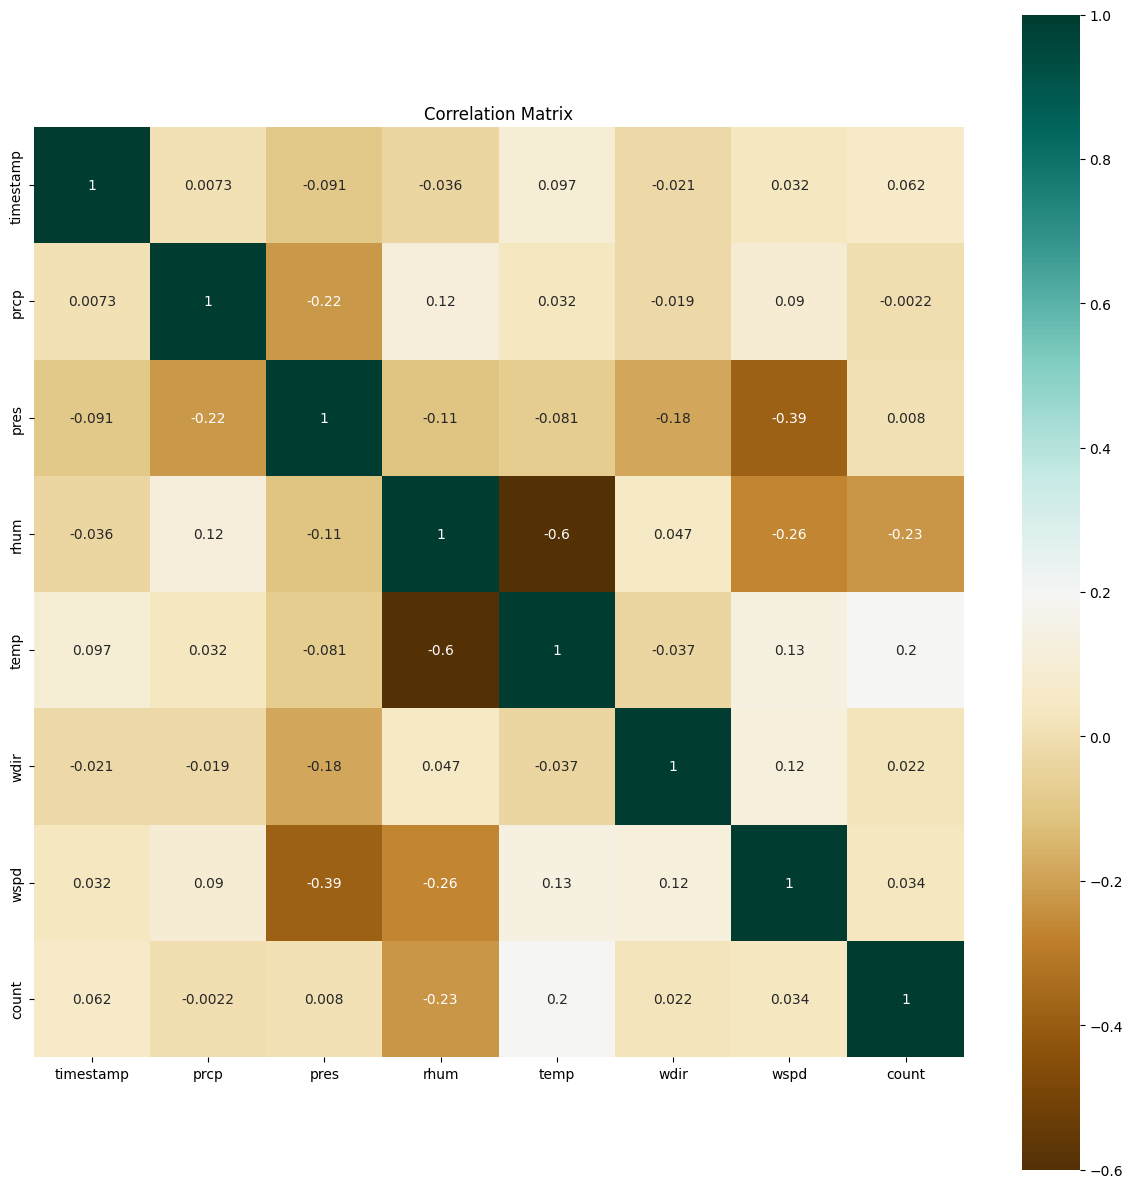

In [19]:
# correlation
correlation = numerical_columns.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='BrBG')

In [13]:
y = df["count"]
y = y.to_frame(name="count")
y.head()

,count
timestamp,
1.617340e+09,19
1.617343e+09,60
1.617347e+09,82
1.617350e+09,82
1.617354e+09,17


In [49]:
y.value_counts()

count
0        10731
12          24
11          21
7           19
2           18
         ...  
1924         1
1918         1
1917         1
1914         1
95848        1
Name: count, Length: 2225, dtype: int64

In [25]:
X = df
X = X.drop(columns = ["count", 'rhum'], axis=1)
X.head()

,prcp,pres,season,temp,wdir,weco,wspd
timestamp,,,,,,,
1.617340e+09,0.0,1029.4,spring,3.0,33.0,fair,14.8
1.617343e+09,0.0,1029.5,spring,3.6,36.0,fair,16.7
1.617347e+09,0.0,1029.7,spring,4.6,39.0,fair,18.5
1.617350e+09,0.0,1029.9,spring,5.8,44.0,fair,20.4
1.617354e+09,0.0,1030.1,spring,6.7,43.0,cloudy,20.4


In [26]:
num_cols = ['prcp','pres', 'temp','wdir','wspd']
cat_cols = ['season','weco']

In [27]:
num_transformer = Pipeline(steps=[
    ('fillna', SimpleImputer(strategy='constant', fill_value=0)),
    ('robust_scaler', RobustScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('cat_transformer', cat_transformer, cat_cols),
        ('num_transformer', num_transformer, num_cols)
    ]
)


In [28]:
preprocessor

ColumnTransformer(transformers=[('cat_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['season', 'weco']),
                                ('num_transformer',
                                 Pipeline(steps=[('fillna',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['prcp', 'pres', 'temp', 'wdir', 'wspd'])])

In [102]:
model_lr = RandomForestClassifier(criterion='gini',
                                  n_estimators=80,
                                  max_depth=10,
                                  n_jobs=-1,
                                  class_weight='balanced')


In [103]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ('model', model_lr)
])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3)

In [105]:
pipeline.fit(X_train, y_train)

/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('OHE',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['season', 'weco']),
                                                 ('num_transformer',
                                                  Pipeline(steps=[('fillna',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['prcp', 'pres', 'temp',
                                                   'wdir', 'wspd'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=80, n_jobs=-1))])

In [106]:
cv_results = cross_validate(pipeline, X_train, y_train, scoring = ['neg_mean_absolute_error'], cv=5)

/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [107]:
cv_results['test_neg_mean_absolute_error'].mean()

-3209.205565223164

In [108]:
y_pred = pipeline.predict(X_test)

In [116]:
len(y_pred), len(y_test)

(4706, 4706)

In [117]:
y_test

,count
timestamp,
1.680163e+09,0
1.640534e+09,0
1.694016e+09,1220
1.683450e+09,7
1.676844e+09,0
...,...
1.675660e+09,0
1.690081e+09,0
1.630505e+09,441


In [55]:
!ls data/

api_data.csv     data_2.csv       full_data.csv    webscraping.csv
data_0.tsv       data_3.csv       sql_data.csv     ws_data.json
data_1.json      folders_data.csv test_data.csv


In [56]:
data_test = pd.read_csv('data/test_data.csv').set_index("timestamp")

In [58]:
data_test.drop(["Unnamed: 0"], axis=1, inplace=True)

In [59]:
data_test

,temp,rhum,prcp,wspd,pres,wdir,weco,season
timestamp,,,,,,,,
1.636621e+09,10.1,98.0,0.0,7.4,1023.9,214.0,Overcast,autumn
1.690999e+09,16.1,90.0,0.0,13.0,987.8,274.0,Heavy Rain Shower,summer
1.647054e+09,7.5,90.0,0.0,16.7,1006.1,182.0,Light Rain,winter
1.642018e+09,2.9,93.0,0.0,5.5,1042.4,228.0,Fair,winter
1.654333e+09,15.0,67.0,0.2,20.5,1021.0,60.0,NaN,spring
...,...,...,...,...,...,...,...,...
1.617732e+09,1.8,54.0,0.0,13.0,1020.5,333.0,Fair,spring
1.645222e+09,3.5,66.0,0.0,31.5,1007.3,266.0,Fair,winter
1.695200e+09,19.3,77.0,0.0,40.8,999.4,200.0,Light Rain,summer


In [60]:
# Assuming df is your DataFrame
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


/var/folders/zy/9r4gn9b574gdnv2l9zms0bz40000gn/T/ipykernel_25673/651537946.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [61]:
df

,prcp,pres,rhum,season,temp,wdir,weco,wspd,count
timestamp,,,,,,,,,
1.617340e+09,0.0,1029.4,84.0,spring,3.0,33.0,fair,14.8,19
1.617343e+09,0.0,1029.5,81.0,spring,3.6,36.0,fair,16.7,60
1.617347e+09,0.0,1029.7,NaN,spring,4.6,39.0,fair,18.5,82
1.617350e+09,0.0,1029.9,71.0,spring,5.8,44.0,fair,20.4,82
1.617354e+09,0.0,1030.1,NaN,spring,6.7,43.0,cloudy,20.4,17
...,...,...,...,...,...,...,...,...,...
1.697990e+09,0.0,1008.3,76.0,autumn,12.2,179.0,fair,7.4,20
1.697994e+09,0.0,1008.9,NaN,autumn,11.2,169.0,fair,7.4,9
1.697998e+09,0.0,1009.3,85.0,autumn,10.0,157.0,fair,7.4,16


In [62]:
rows_with_nan = data_test[data_test.isna().any(axis=1)]
num_rows_with_nan = len(rows_with_nan)
print("Number of rows with NaN in any columns:", num_rows_with_nan)
print("Number of rows total:", data_test.shape[0])

Number of rows with NaN in any columns: 84
Number of rows total: 6722


In [123]:
y_test_data = pipeline.predict(data_test)

In [124]:
unique, counts = np.unique(y_test_data, return_counts=True)

In [125]:
unique

array([    0,     1,     4,     6,     9,    10,    11,    14,    19,
          20,    21,    22,    23,    26,    28,    30,    31,    32,
          33,    34,    35,    36,    37,    41,    42,    43,    44,
          47,    53,    55,    57,    58,    59,    60,    64,    71,
          72,    75,    76,    77,    79,    80,    83,    84,    85,
          87,    88,    90,    91,    99,   103,   105,   106,   118,
         132,   133,   141,   142,   144,   147,   154,   155,   156,
         157,   161,   163,   164,   165,   168,   169,   176,   178,
         180,   182,   185,   186,   187,   192,   194,   195,   199,
         200,   201,   202,   205,   206,   208,   209,   210,   212,
         215,   216,   220,   221,   224,   227,   233,   240,   242,
         243,   248,   252,   260,   263,   270,   271,   279,   288,
         289,   291,   295,   298,   300,   305,   306,   308,   309,
         312,   316,   317,   322,   323,   324,   329,   330,   332,
         335,   336,

In [126]:
counts

array([1392,    5,   13,    3,    1,    2,    5,    1,    1,   16,    1,
          3,    6,    3,    3,    3,    7,    1,    1,    1,    1,    6,
         12,    3,    1,   17,    1,    4,    1,    5,    1,   47,    6,
          7,    5,    3,    7,    2,    1,    9,    3,    1,   13,    3,
         14,    1,    3,    1,    1,    3,    2,    1,    1,    7,    2,
          1,    2,    2,    3,    1,    1,    6,    9,    1,    1,    2,
          1,    1,    3,   33,    1,    3,    7,    1,    1,   15,    1,
          2,    1,   14,    1,   13,    1,   20,    1,    9,   11,    2,
          1,    5,    1,    6,    2,   13,   28,    1,    3,    3,    2,
          5,    4,    3,    8,   10,    4,    2,   10,    6,    1,   26,
         12,   74,    1,    3,   13,    1,    3,    1,    1,   11,    3,
         29,    3,    2,    1,    2,    2,    7,    1,    7,    1,    1,
          2,   14,    1,    2,    2,   16,    2,    2,   25,    8,    1,
          2,    2,    6,    1,    1,    5,   43,   

In [127]:
len(y_test_data), data_test.shape

(6722, (6722, 8))

In [128]:
test_y = pd.DataFrame(y_test_data, columns=['counts'])

In [129]:
len(test_y['counts'].unique())

612

In [130]:
len(test_y)

6722

In [131]:
data_test.index

Index([1636621200.0, 1690999200.0, 1647054000.0, 1642017600.0, 1654333200.0,
       1693659600.0, 1692532800.0, 1627934400.0, 1689757200.0, 1694548800.0,
       ...
       1669982400.0, 1656478800.0, 1631419200.0, 1665298800.0, 1644555600.0,
       1617732000.0, 1645221600.0, 1695200400.0, 1678269600.0, 1625803200.0],
      dtype='float64', name='timestamp', length=6722)

In [132]:

df_concatenated_2 = pd.DataFrame({'timestamp': data_test.index, 'count': test_y['counts']})


In [133]:
df_concatenated_2

,timestamp,count
0,1.636621e+09,1416
1,1.690999e+09,0
2,1.647054e+09,1618
3,1.642018e+09,1251
4,1.654333e+09,0
...,...,...
6717,1.617732e+09,20
6718,1.645222e+09,288
6719,1.695200e+09,2187
6720,1.678270e+09,0


In [134]:
df_concatenated_2.to_csv('baseline_results_2.csv', index = False)